# Imports

In [11]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk import FreqDist
from nltk import classify
from nltk import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import matplotlib.pyplot as plt

# Downloading Resources

In [12]:
# Download NLTK resources
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/shabab/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shabab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shabab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/shabab/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/shabab/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Data Visualizations

## Frequency Distribution of Words 

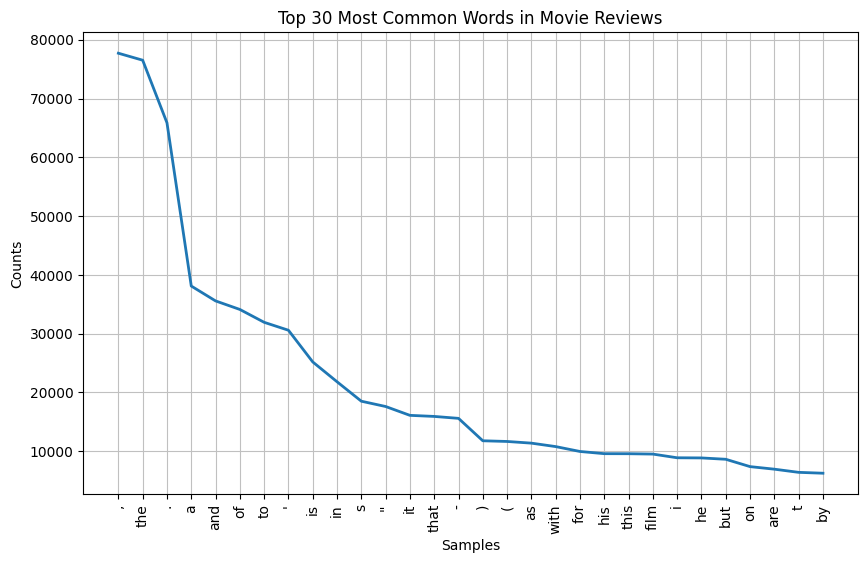

In [3]:
# Get all words from the movie reviews
all_words = [word.lower() for word in movie_reviews.words()]

# Create a frequency distribution of words
all_words_freq = FreqDist(all_words)

# Plot the most common 30 words
plt.figure(figsize=(10, 6))
plt.title('Top 30 Most Common Words in Movie Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
all_words_freq.plot(30, cumulative=False)
plt.show()

## Filtered Frequency Distribution of Words 

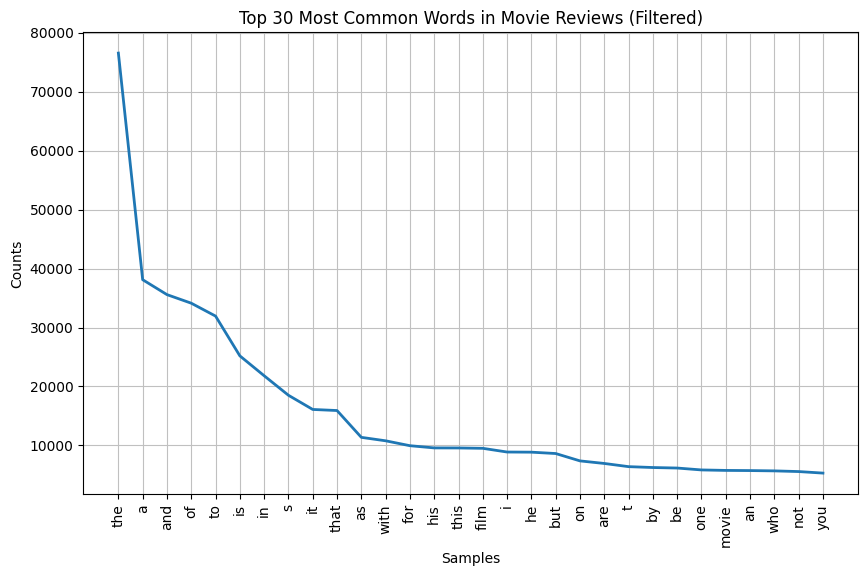

In [4]:
words = [word.lower() for word in movie_reviews.words() if word.isalpha()]

# Create a frequency distribution of words
word_freq = FreqDist(words)

# Plot the most common 30 words
plt.figure(figsize=(10, 6))
plt.title('Top 30 Most Common Words in Movie Reviews (Filtered)')
word_freq.plot(30, cumulative=False)
plt.show()

## WordCloud

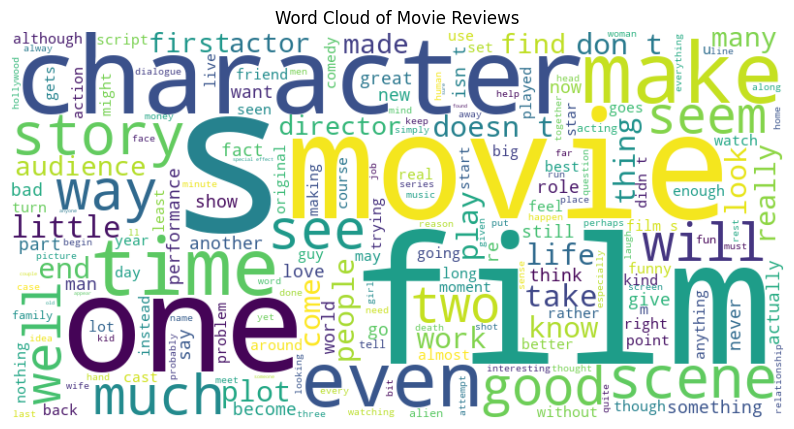

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the list of words into a string
text = " ".join(words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

## Sentiment-based Word Clouds

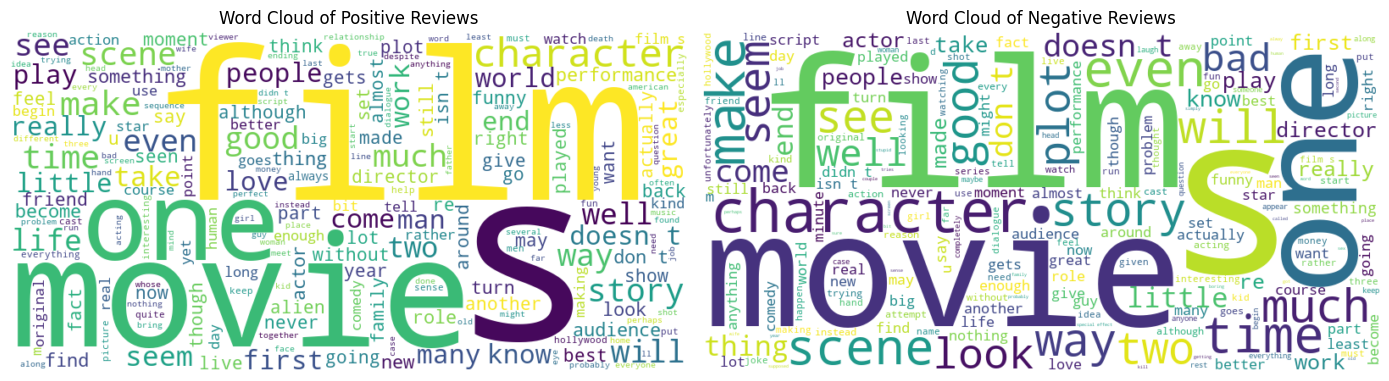

In [13]:
from wordcloud import WordCloud

# Get words from positive and negative movie reviews
pos_words = ' '.join([word.lower() for word in movie_reviews.words(categories='pos') if word.isalpha()])
neg_words = ' '.join([word.lower() for word in movie_reviews.words(categories='neg') if word.isalpha()])

# Generate word clouds for positive and negative reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_words)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(neg_words)

# Display the word clouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')

plt.tight_layout()
plt.show()

## POS Distribution

POS stands for Parts of Speech, and it refers to the grammatical categorization of words in a sentence. NLTK (Natural Language Toolkit) uses a standard set of tags for POS tagging based on the Penn Treebank Project. These tags represent different parts of speech and other linguistic features. Here are some of the common POS tags and their meanings:

- **CC**: Coordinating conjunction
- **CD**: Cardinal number
- **DT**: Determiner
- **EX**: Existential there
- **FW**: Foreign word
- **IN**: Preposition or subordinating conjunction
- **JJ**: Adjective
- **JJR**: Adjective, comparative
- **JJS**: Adjective, superlative
- **LS**: List item marker
- **MD**: Modal
- **NN**: Noun, singular or mass
- **NNS**: Noun, plural
- **NNP**: Proper noun, singular
- **NNPS**: Proper noun, plural
- **PDT**: Predeterminer
- **POS**: Possessive ending
- **PRP**: Personal pronoun
- **PRP$**: Possessive pronoun
- **RB**: Adverb
- **RBR**: Adverb, comparative
- **RBS**: Adverb, superlative
- **RP**: Particle
- **SYM**: Symbol
- **TO**: to
- **UH**: Interjection
- **VB**: Verb, base form
- **VBD**: Verb, past tense
- **VBG**: Verb, gerund or present participle
- **VBN**: Verb, past participle
- **VBP**: Verb, non-3rd person singular present
- **VBZ**: Verb, 3rd person singular present
- **WDT**: Wh-determiner
- **WP**: Wh-pronoun
- **WP$**: Possessive wh-pronoun
- **WRB**: Wh-adverb

These tags categorize words based on their grammatical roles in a sentence. POS tagging is crucial in natural language processing as it helps in various tasks like syntax analysis, information extraction, and sentiment analysis.

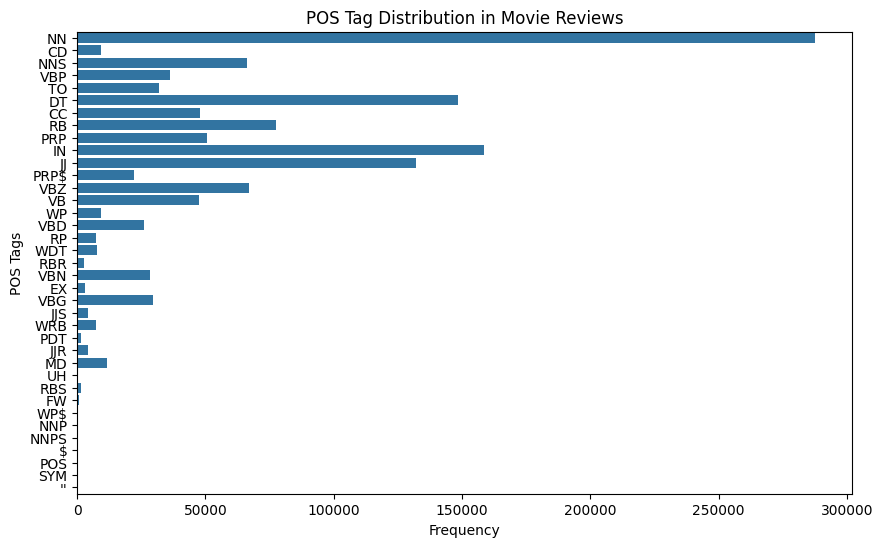

In [6]:
import seaborn as sns

# POS tagging of words
pos_tags = nltk.pos_tag(words)

# Extract POS tags
tags = [tag[1] for tag in pos_tags]

# Plot POS tag distribution
plt.figure(figsize=(10, 6))
sns.countplot(tags)
plt.title('POS Tag Distribution in Movie Reviews')
plt.ylabel('POS Tags')
plt.xlabel('Frequency')
plt.show()

## N-gram Visualization

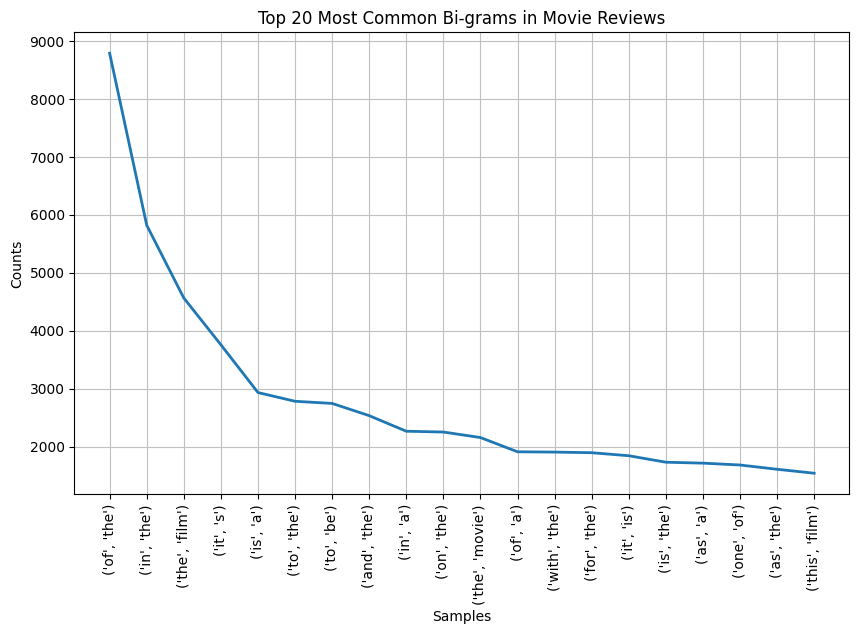

In [7]:
from nltk.util import ngrams

# Generate bi-grams
bi_grams = list(ngrams(words, 2))

# Create frequency distribution of bi-grams
bi_gram_freq = FreqDist(bi_grams)

# Plot the most common 20 bi-grams
plt.figure(figsize=(10, 6))
plt.title('Top 20 Most Common Bi-grams in Movie Reviews')
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
bi_gram_freq.plot(20)
plt.show()

## Named Entity Recognition (NER) Visualization

In [8]:
from nltk import ne_chunk
from nltk.tokenize import word_tokenize

# Sample text for NER
sample_text = "The movie starred Tom Hanks and was directed by Steven Spielberg."

# Tokenize the text
tokens = word_tokenize(sample_text)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Perform NER and visualize
ner_tags = ne_chunk(pos_tags)

# Uncomment when you want to see the visualization
# ner_tags.draw()

## Sentence Length Distribution

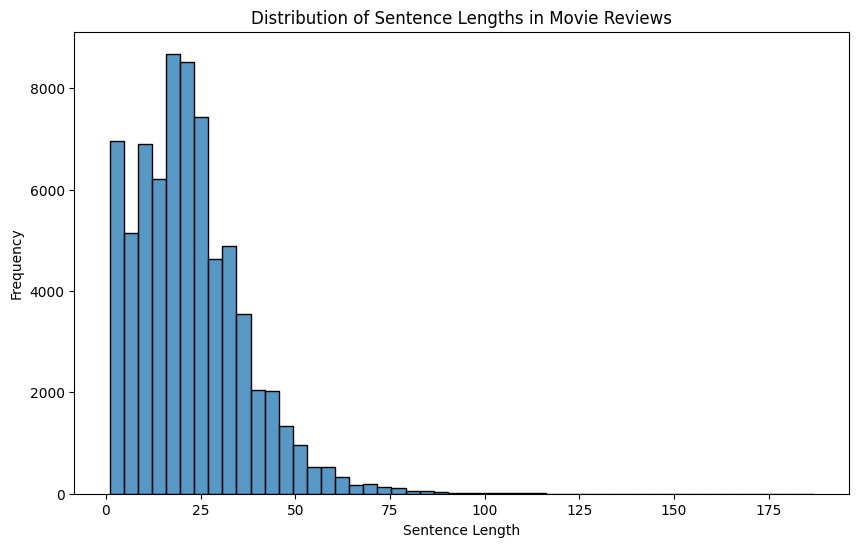

In [9]:
# Get sentences from movie reviews
sentences = nltk.corpus.movie_reviews.sents()

# Calculate sentence lengths
sentence_lengths = [len(sentence) for sentence in sentences]

# Plot sentence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, bins=50)
plt.title('Distribution of Sentence Lengths in Movie Reviews')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

## Dispersion Plot

<Figure size 1000x600 with 0 Axes>

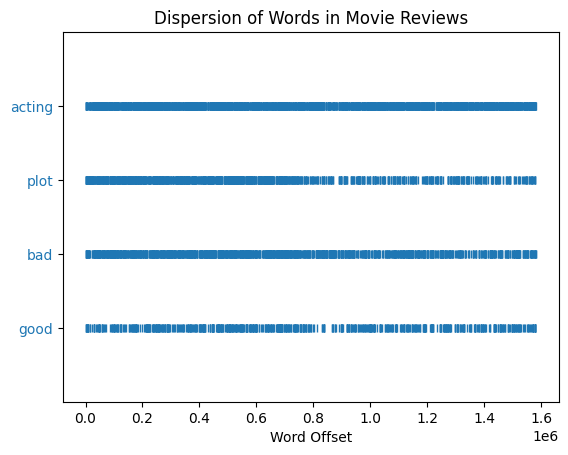

In [10]:
from nltk.draw import dispersion_plot

# Specify words for dispersion plot
target_words = ['good', 'bad', 'plot', 'acting']

# Create a list of words in the text
text_words = nltk.Text(nltk.corpus.movie_reviews.words())

# Generate dispersion plot
plt.figure(figsize=(10, 6))
text_words.dispersion_plot(target_words)
plt.title('Dispersion of Words in Movie Reviews')
plt.show()